,ds,y
45383,2013-01-17 11:00:00,38.0
21939,2013-01-17 12:00:00,47.0
42787,2013-01-17 13:00:00,44.0
35593,2013-01-17 14:00:00,20.0
35595,2013-01-17 15:00:00,35.0


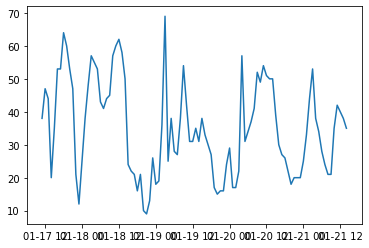

In [49]:
# load JSON
import json
import pandas as pd
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data[400:500]

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
plt.plot(df['ds'],df['y'])
df.head()

In [51]:
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
#df = df.set_index('ds')
df.head()

,ds,index,y
0,2013-01-17 11:00:00,45383,38.0
1,2013-01-17 12:00:00,21939,47.0
2,2013-01-17 13:00:00,42787,44.0
3,2013-01-17 14:00:00,35593,20.0
4,2013-01-17 15:00:00,35595,35.0


In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.y, model='additive',freq=12, extrapolate_trend='freq')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

0     43.229264
1     43.141997
2     43.054730
3     42.967463
4     42.880196
        ...    
95    35.384664
96    35.989559
97    36.594454
98    37.199349
99    37.804244
Name: y, Length: 100, dtype: float64
0    -1.787900
1     0.742549
2     1.462812
3     1.609002
4     7.580093
        ...   
95   -3.477757
96   -1.787900
97    0.742549
98    1.462812
99    1.609002
Name: y, Length: 100, dtype: float64
0     -3.441364
1      3.115454
2     -0.517542
3    -24.576465
4    -15.460289
        ...    
95     3.093093
96     7.798341
97     2.662997
98    -0.662162
99    -4.413246
Name: y, Length: 100, dtype: float64
0     38.0
1     47.0
2     44.0
3     20.0
4     35.0
      ... 
95    35.0
96    42.0
97    40.0
98    38.0
99    35.0
Name: y, Length: 100, dtype: float64


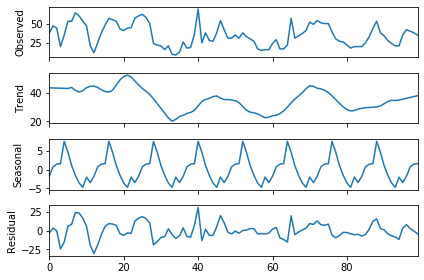

In [53]:
result.plot()
plt.show()